In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vice
from vice.toolkit import J21_sf_law

from multizone.src.yields import J21
from multizone.src.models.utils import constant, exponential
from multizone.src.models.normalize import integrate_infall, continuous_recycling, calculate_mstar
from multizone.src.models import twoinfall, twoinfall_sf_law
from multizone.src.models.diskmodel import two_component_disk
import _globals

## Constant Infall

In [2]:
ifr = constant()
tau_star = J21_sf_law(1)
eta = 0.6
dt = 0.01
recycling = 0.4
times, sfh_integrated = integrate_infall(ifr, tau_star, eta, recycling=recycling, dt=dt)

In [3]:
name1 = '../data/onezone/int_test/constant'
sz = vice.singlezone(
    name = name1,
    func = ifr,
    mode = "ifr",
    eta = eta,
    tau_star = tau_star,
    Mg0 = 0,
    dt = dt,
)
simtime = np.arange(0., 13.21, 0.01)
sz.run(simtime, overwrite=True)

In [4]:
name2 = '../data/onezone/int_test/constant_inst_rec'
sz = vice.singlezone(
    name = name2,
    func = ifr,
    mode = "ifr",
    eta = eta,
    tau_star = tau_star,
    Mg0 = 0,
    dt = dt,
    recycling = recycling,
)
simtime = np.arange(0., 13.21, 0.01)
sz.run(simtime, overwrite=True)

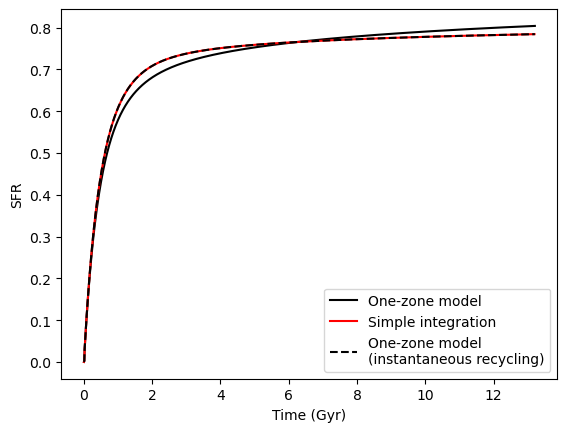

In [5]:
hist1 = vice.history(name1)
hist2 = vice.history(name2)

fig, ax = plt.subplots()
ax.plot(hist1['time'], hist1['sfr'], 'k-', label='One-zone model')
ax.plot(times, sfh_integrated, 'r-', label='Simple integration')
ax.plot(hist2['time'], hist2['sfr'], 'k--', label='One-zone model\n(instantaneous recycling)')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

In [6]:
mstar = sum([sfr * dt * 1e9 * (1 - recycling) for sfr in sfh_integrated])
print(mstar)
print(hist1['mstar'][-1])
print(hist2['mstar'][-1])
print(sum(hist2['sfr']) * dt * 1e9 * (1 - recycling))

5792176560.030154
5764287000.0
5770704000.0
5797176521.556


In [7]:
# custom integrator with continuous recycling
times, sfh_continuous = integrate_infall(ifr, tau_star, eta, recycling='continuous', dt=dt)

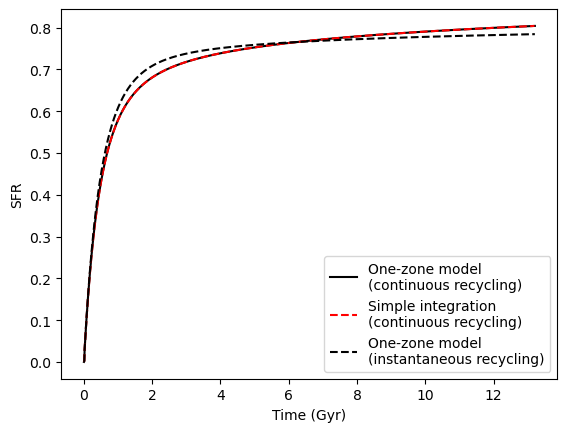

In [8]:
hist1 = vice.history(name1)
hist2 = vice.history(name2)

fig, ax = plt.subplots()
ax.plot(hist1['time'], hist1['sfr'], 'k-', label='One-zone model\n(continuous recycling)')
ax.plot(times, sfh_continuous, 'r--', label='Simple integration\n(continuous recycling)')
ax.plot(hist2['time'], hist2['sfr'], 'k--', label='One-zone model\n(instantaneous recycling)')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

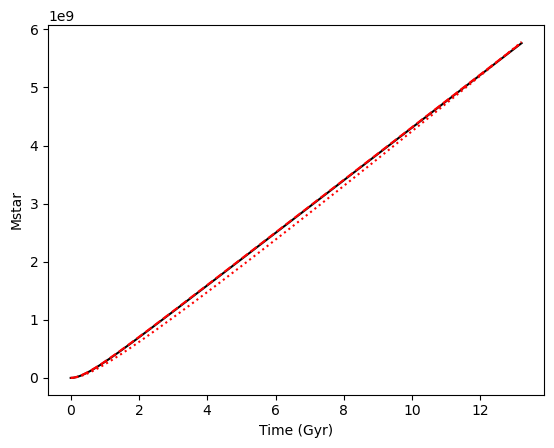

In [9]:
mstar_pred = calculate_mstar(hist1['sfr'], recycling='continuous')
mstar_approx = calculate_mstar(hist1['sfr'], recycling=0.4)

fig, ax = plt.subplots()
ax.plot(hist1['time'], hist1['mstar'], 'k-', label='One-zone model')
ax.plot(hist1['time'], mstar_pred, 'r--', label='Predicted')
ax.plot(hist1['time'], mstar_approx, 'r:', label='Approximate')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Mstar')
plt.show()

## Exponential Infall

In [10]:
ifr = exponential(timescale=1, norm=1)
tau_star = twoinfall_sf_law(1, factor=1)
eta = 2
dt = 0.01
recycling = 0.4
times, sfh_integrated = integrate_infall(ifr, tau_star, eta)

In [11]:
name = '../data/onezone/int_test/exponential'
sz = vice.singlezone(
    name = name,
    func = ifr,
    mode = "ifr",
    eta = eta,
    tau_star = tau_star,
    Mg0 = 0,
    dt = dt,
    # recycling = recycling
)
simtime = np.arange(0., 13.21, 0.01)
sz.run(simtime, overwrite=True)

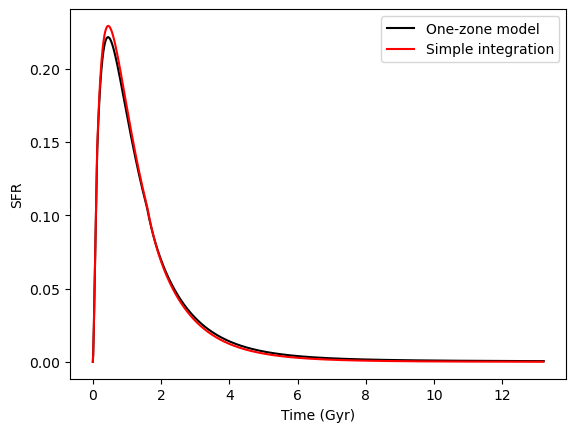

In [12]:
hist = vice.history(name)

fig, ax = plt.subplots()
ax.plot(hist['time'], hist['sfr'], 'k-', label='One-zone model')
ax.plot(times, sfh_integrated, 'r-', label='Simple integration')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

In [13]:
mstar = sum(sfh_integrated) * dt * 1e9 * (1 - recycling)
print(mstar)
print(hist['mstar'][-1])
print(sum(hist['sfr']) * dt * 1e9 * (1 - recycling))

231522979.24543843
219961400.0
234011673.93360004


## Two-Infall Model

In [14]:
radius = 8
dr = 0.1
area = np.pi * ((radius + dr)**2 - radius**2)
ifr = twoinfall(radius, first_timescale=1, second_timescale=10, onset=4)
tau_star = twoinfall_sf_law(area, onset=4)
eta = 2.15
dt = 0.01
recycling = 0.4
times, sfh_integrated = integrate_infall(ifr, tau_star, eta, recycling=recycling, dt=dt)

In [15]:
name1 = '../data/onezone/int_test/twoinfall1'
sz = vice.singlezone(
    name = name1,
    func = ifr,
    mode = "ifr",
    eta = eta,
    tau_star = tau_star,
    Mg0 = 0,
    dt = dt,
    # recycling = recycling
)
simtime = np.arange(0., 13.21, 0.01)
sz.run(simtime, overwrite=True)

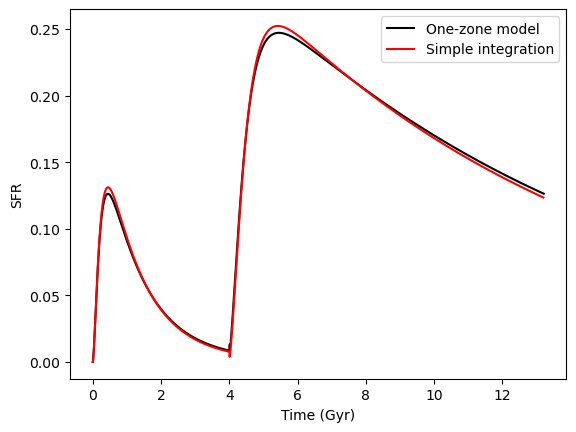

In [16]:
hist = vice.history(name1)

fig, ax = plt.subplots()
ax.plot(hist['time'], hist['sfr'], 'k-', label='One-zone model')
ax.plot(times, sfh_integrated, 'r-', label='Simple integration')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

In [17]:
mstar = sum(sfh_integrated) * dt * 1e9 * (1 - recycling)
print(mstar)
print(hist['mstar'][-1])
print(sum(hist['sfr']) * dt * 1e9 * (1 - recycling))

1132608544.3038878
1131905000.0
1134426202.7879999


In [18]:
mstar_at_onset = sum(sfh_integrated[:400]) * dt * 1e9 * (1 - recycling)
print(mstar_at_onset)
print(hist['mstar'][399])
print(sum(hist['sfr'][:400]) * dt * 1e9 * (1 - recycling))

121718684.29059918
124453700.0
120473699.38800001


In [19]:
print(hist['sfr'][1])

0.001918591


In [20]:
print(mstar_at_onset / (mstar - mstar_at_onset))

0.12040746386455903


In [21]:
print(hist['mstar'][399] / (hist['mstar'][-1] - hist['mstar'][399]))

0.12353321694061042


In [22]:
mw_disk = two_component_disk()
print(mw_disk.thick_to_thin(0))
print(mw_disk.thick_to_thin(8))

0.27
0.12131882031164984


In [23]:
ifr = twoinfall(radius, first_timescale=1, second_timescale=10, onset=4, recycling='continuous')
times, sfh_continuous = integrate_infall(ifr, tau_star, eta, recycling='continuous', dt=dt)

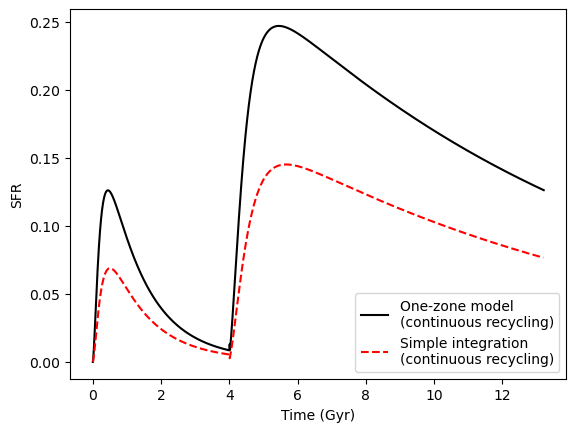

In [24]:
hist1 = vice.history(name1)

fig, ax = plt.subplots()
ax.plot(hist1['time'], hist1['sfr'], 'k-', label='One-zone model\n(continuous recycling)')
ax.plot(times, sfh_continuous, 'r--', label='Simple integration\n(continuous recycling)')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

In [25]:
mstar_at_onset = (sum(sfh_continuous[:400]) - continuous_recycling(sfh_continuous[:400])) * dt * 1e9
print(mstar_at_onset)
print(hist['mstar'][399])
print(sum(hist['sfr'][:400]) * dt * 1e9 * (1 - recycling))

115884466.40564457
124453700.0
120473699.38800001


### Variant

In [26]:
radius = 8
dr = 0.1
area = np.pi * ((radius + dr)**2 - radius**2)
ifr = twoinfall(radius, first_timescale=1, second_timescale=1, onset=4)
tau_star = twoinfall_sf_law(area, onset=4)
eta = 2.15
dt = 0.01
recycling = 0.4
times, sfh_integrated = integrate_infall(ifr, tau_star, eta, recycling=recycling, dt=dt)

In [27]:
name2 = '../data/onezone/int_test/twoinfall2'
sz = vice.singlezone(
    name = name2,
    func = ifr,
    mode = "ifr",
    eta = eta,
    tau_star = tau_star,
    Mg0 = 0,
    dt = dt,
    # recycling = recycling
)
simtime = np.arange(0., 13.21, 0.01)
sz.run(simtime, overwrite=True)

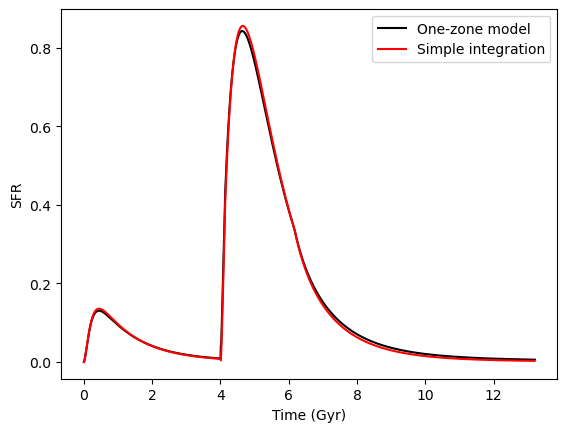

In [28]:
hist = vice.history(name2)

fig, ax = plt.subplots()
ax.plot(hist['time'], hist['sfr'], 'k-', label='One-zone model')
ax.plot(times, sfh_integrated, 'r-', label='Simple integration')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('SFR')
ax.legend()
plt.show()

In [29]:
mstar = sum(sfh_integrated) * dt * 1e9 * (1 - recycling)
print(mstar)
print(hist['mstar'][-1])
print(sum(hist['sfr']) * dt * 1e9 * (1 - recycling))

1141020971.902863
1112855000.0
1157173066.5119998


In [30]:
mstar_at_onset = sum(sfh_integrated[:400]) * dt * 1e9 * (1 - recycling)
print(mstar_at_onset)
print(hist['mstar'][399])
print(sum(hist['sfr'][:400]) * dt * 1e9 * (1 - recycling))

125433784.98239006
128246600.0
124155700.05


In [31]:
print(mstar_at_onset / (mstar - mstar_at_onset))

0.12350863283608199


In [32]:
print(hist['mstar'][399] / (hist['mstar'][-1] - hist['mstar'][399]))

0.13025137709570628


## vs radius

In [33]:
zones = [1, 80, 150]
dr = 0.1
dt = 0.01
eta = 2.15
simtime = np.arange(0., 13.21, 0.01)
for z in zones:
    radius = z * dr
    area = np.pi * ((radius + dr)**2 - radius**2)
    ifr = twoinfall(radius, first_timescale=1, second_timescale=10, onset=4,
                   dr=dr, dt=dt)
    print(ifr.first.norm)
    tau_star = twoinfall_sf_law(area, onset=4)
    name = '../data/onezone/int_test/zone%d' % z
    sz = vice.singlezone(
        name = name,
        func = ifr,
        mode = "ifr",
        **_globals.ONEZONE_DEFAULTS
    )
    sz.eta = eta
    sz.tau_star = tau_star
    sz.dt = dt
    sz.run(simtime, overwrite=True)

0.27505036484671763
0.5885323673826056
1.0941796147566591


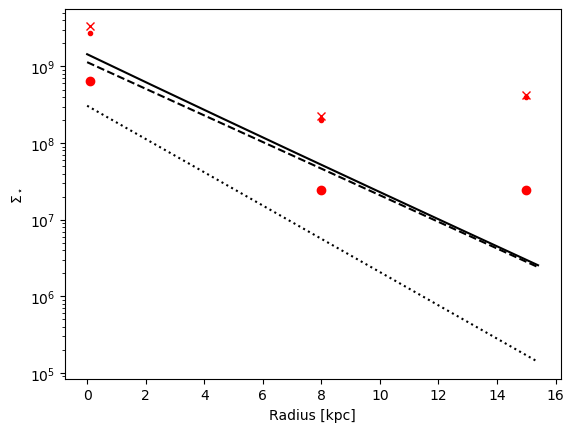

In [34]:
fig, ax = plt.subplots()
mw_disk = two_component_disk()
dr = 0.1
rbins = np.arange(0., 15.5, dr)
ax.plot(rbins, [mw_disk(r) for r in rbins], 'k-')
ax.plot(rbins, [mw_disk.thick_disk(r) for r in rbins], 'k:')
ax.plot(rbins, [mw_disk.thin_disk(r) for r in rbins], 'k--')

radii = []
mstar_total = []
mstar_thick = []
mstar_thin = []
for z in zones:
    radius = z * dr
    radii.append(radius)
    area = np.pi * ((radius + dr)**2 - radius**2)
    name = '../data/onezone/int_test/zone%d' % z
    hist = vice.history(name)
    onset = 4
    mstar_total.append(hist['mstar'][-1] / area)
    mstar_thick.append(hist['mstar'][int(onset/dt)-1] / area)
    mstar_thin.append((mstar_total[-1] - mstar_thick[-1]))

ax.plot(radii, mstar_total, 'rx')
ax.plot(radii, mstar_thick, 'ro')
ax.plot(radii, mstar_thin, 'r.')

ax.set_xlabel('Radius [kpc]')
ax.set_ylabel(r'$\Sigma_\star$')
ax.set_yscale('log')

plt.show()